In [1]:
import numpy as np
import xarray as xr
import pandas as pd

import os
import pickle

In [2]:
datapd = pd.read_csv('all_coord.csv')

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as colors
import matplotlib.path as mpath
import cmocean
import seaborn as sns
from adjustText import adjust_text

In [4]:
from scipy import ndimage
from skimage import measure
from skimage.segmentation import flood_fill

In [5]:
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

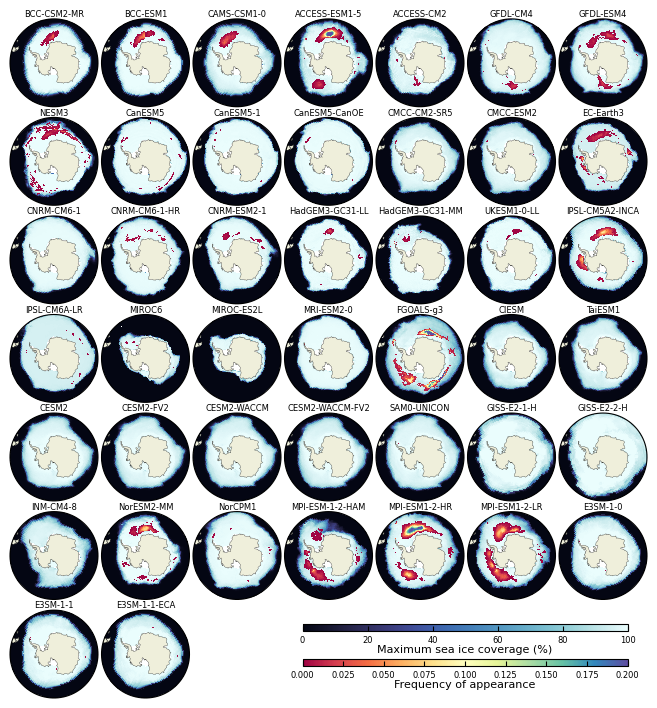

In [7]:
fig = plt.figure(figsize=(6.5,7))

n = 1

# newcmap = cmocean.tools.crop_by_percent(cmocean.cm.matter, 20, which='min', N=None)
for i in range(0, len(datapd)):
    # pltd_dict = {'pltd':pltd, 'pld_pc':pltd_pc,'pltx':pltx, 'plty':plty}

    pltd_name = 'data_polynya/' + datapd.at[i, 'source_id'] + '.pickle'

    fpathst = 'data_mld/' + datapd.at[i, 'source_id'] + '.pickle'

    if os.path.exists(pltd_name):
        if not os.path.exists(fpathst):
            continue

        with open(pltd_name, 'rb') as f:
            pltd_dict = pickle.load(f)
        
        ax = fig.add_subplot(7, 7, n, projection=ccrs.SouthPolarStereo())
        plt.subplots_adjust(left=0.01,
                            bottom=0.01, 
                            right=0.99, 
                            top=0.99, 
                            wspace=0.04, 
                            hspace=0.04)
        # fig.subplots_adjust(wspace=0.04, hspace=0.12)
        ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())

        pltx = pltd_dict['pltx']
        plty = pltd_dict['plty']
        pltd = pltd_dict['pltd']
        pltd_pc = pltd_dict['pld_pc']

        # gl = ax.gridlines(
        #     xlocs = np.arange(-180,180,90), 
        #     ylocs = np.arange(-90,90,20),
        #     draw_labels=False, y_inline=True)
            
        ax.set_title('{}'.format(datapd.at[i, 'source_id']), fontsize=6, pad=-0.5)
        
                
        im = ax.pcolormesh(pltx, plty, pltd, 
                           transform=ccrs.PlateCarree(), 
                           vmin=0, vmax=100, 
                           cmap=cmocean.cm.ice)
        
        # newcmap = cmocean.tools.crop_by_percent(cmocean.cm.speed_r, 50, which='min', N=None)
        im2 = ax.pcolormesh(pltx, plty, pltd_pc, 
                            transform=ccrs.PlateCarree(), 
                            vmin = 0, vmax = 0.20, cmap=plt.cm.Spectral)
        ax.add_feature(cfeature.LAND, zorder=1)#, color='0.8')
        ax.add_feature(cfeature.COASTLINE, linewidth=0.2)
        ax.set_boundary(circle, transform=ax.transAxes)
        
        n = n+1       

        # if n > 3:
        #     break 


cbar_ax1 = fig.add_axes([0.46, 0.11, 0.50, 0.01])
cbar1 = fig.colorbar(im, cax=cbar_ax1, orientation='horizontal')
cbar1.set_label('Maximum sea ice coverage (%)', size=8, labelpad=-0.1)
cbar1.ax.tick_params(labelsize=6,direction='in')

cbar_ax2 = fig.add_axes([0.46, 0.06, 0.50, 0.01])
cbar2 = fig.colorbar(im2, cax=cbar_ax2, orientation='horizontal')
cbar2.set_label('Frequency of appearance', size=8, labelpad=-0.1)
cbar2.ax.tick_params(labelsize=6,direction='in')

fig.savefig('Polynya_Multi.png', dpi = 300)


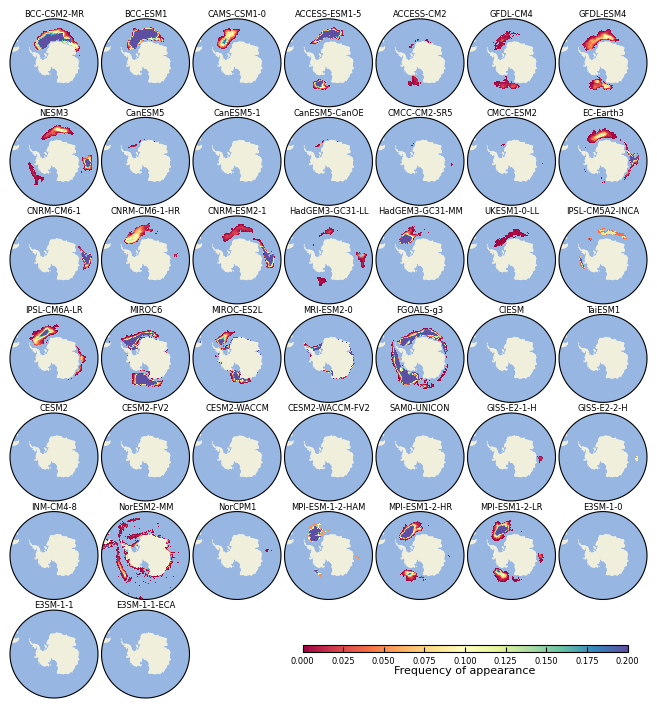

In [8]:
fig = plt.figure(figsize=(6.5,7))

n = 1

# newcmap = cmocean.tools.crop_by_percent(cmocean.cm.matter, 20, which='min', N=None)
for i in range(0, len(datapd)):
    # pltd_dict = {'pltd':pltd, 'pld_pc':pltd_pc,'pltx':pltx, 'plty':plty}

    pltd_name = 'data_polynya/' + datapd.at[i, 'source_id'] + '.pickle'

    fpathst = 'data_mld/' + datapd.at[i, 'source_id'] + '.pickle'

    if os.path.exists(pltd_name):
        if not os.path.exists(fpathst):
            continue

        with open(fpathst, 'rb') as f:
            pltd_dict = pickle.load(f)
        
        ax = fig.add_subplot(7, 7, n, projection=ccrs.SouthPolarStereo())
        plt.subplots_adjust(left=0.01,
                            bottom=0.01, 
                            right=0.99, 
                            top=0.99, 
                            wspace=0.04, 
                            hspace=0.04)
        # fig.subplots_adjust(wspace=0.04, hspace=0.12)
        ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())

        pltx = pltd_dict['pltx']
        plty = pltd_dict['plty']

        pltm = xr.where(pltd_dict['mldmax']>=1000, 1, np.nan)
        pltf = pltd_dict['mld2kfq']


        # gl = ax.gridlines(
        #     xlocs = np.arange(-180,180,90), 
        #     ylocs = np.arange(-90,90,20),
        #     draw_labels=False, y_inline=True)
            
        ax.set_title('{}'.format(datapd.at[i, 'source_id']), fontsize=6, pad=-0.5)
        
    
        # im = ax.pcolormesh(pltx, plty, pltm, vmin = 0, vmax=1.2, 
        #                    transform=ccrs.PlateCarree(), cmap=plt.cm.gray)
        ax.add_feature(cfeature.LAND, zorder=1)
        ax.add_feature(cfeature.OCEAN)
        ax.set_boundary(circle, transform=ax.transAxes)
        im2 = ax.pcolormesh(pltx, plty, pltf, vmin = 0, vmax=0.2, 
                           transform=ccrs.PlateCarree(), cmap=plt.cm.Spectral)
        # cbar = plt.colorbar(im) 

        
        # newcmap = cmocean.tools.crop_by_percent(cmocean.cm.speed_r, 50, which='min', N=None)
        # im2 = ax.pcolormesh(pltx, plty, pltd_pc, 
        #                     transform=ccrs.PlateCarree(), 
        #                     vmin = 0, vmax = 0.20, cmap=plt.cm.Spectral)
        # ax.add_feature(cfeature.LAND, zorder=1)#, color='0.8')
        # ax.add_feature(cfeature.COASTLINE, linewidth=0.2)
        # ax.set_boundary(circle, transform=ax.transAxes)
        
        n = n+1       

        # if n > 3:
        #     break 


# cbar_ax1 = fig.add_axes([0.46, 0.11, 0.50, 0.01])
# cbar1 = fig.colorbar(im, cax=cbar_ax1, orientation='horizontal')
# cbar1.set_label('Maximum sea ice coverage (%)', size=8, labelpad=-0.1)
# cbar1.ax.tick_params(labelsize=6,direction='in')

cbar_ax2 = fig.add_axes([0.46, 0.08, 0.50, 0.01])
cbar2 = fig.colorbar(im2, cax=cbar_ax2, orientation='horizontal')
cbar2.set_label('Frequency of appearance', size=8, labelpad=-0.1)
cbar2.ax.tick_params(labelsize=6,direction='in')

fig.savefig('DeepConvection_Multi.png', dpi = 300)


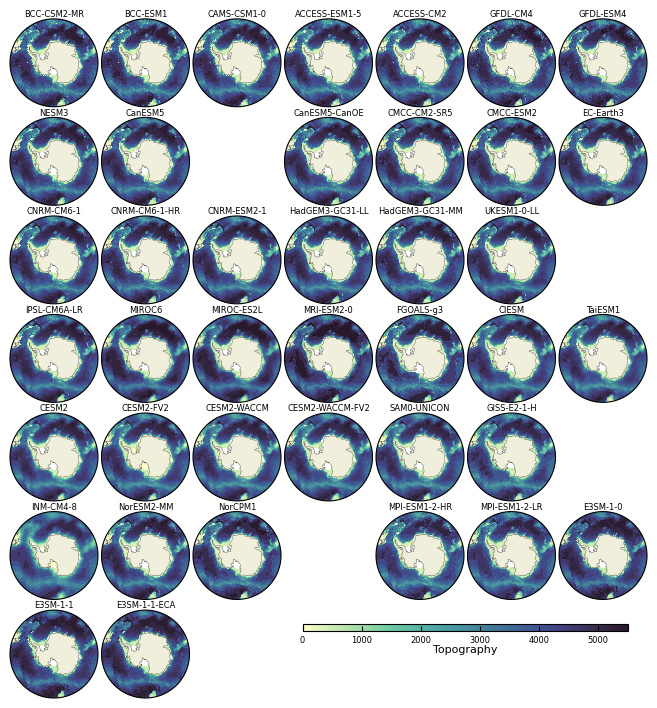

In [9]:
fig = plt.figure(figsize=(6.5,7))

n = 1

# newcmap = cmocean.tools.crop_by_percent(cmocean.cm.matter, 20, which='min', N=None)
for i in range(0, len(datapd)):
    # pltd_dict = {'pltd':pltd, 'pld_pc':pltd_pc,'pltx':pltx, 'plty':plty}

    pltd_name = 'data_polynya/' + datapd.at[i, 'source_id'] + '.pickle'

    fpathst = 'data_mld/' + datapd.at[i, 'source_id'] + '.pickle'

    if os.path.exists(pltd_name):
        if not os.path.exists(fpathst):
            continue

        path_data_topo = 'data_topo/' + datapd.at[i, 'source_id'] + '.pickle'
        
        if os.path.exists(path_data_topo):
            with open(path_data_topo, 'rb') as f:
                pltd = pickle.load(f)
            
            
            if pd.isna(datapd.at[i, 'latname']):
                if pd.isna(datapd.at[i, 'xname']):
                    print("{} doesn't have regular grid.".format(datapd.at[i, 'source_id']))
                    continue
                else:
                    pltx0 = pltd[datapd.at[i, 'xname']]
                    plty0 = pltd[datapd.at[i, 'yname']]
                    pltx, plty = np.meshgrid(pltx0, plty0)
            else:
                pltx = pltd[datapd.at[i, 'lonname']]
                plty = pltd[datapd.at[i, 'latname']]

        else:
            n = n+1 
            continue

        ax = fig.add_subplot(7, 7, n, projection=ccrs.SouthPolarStereo())
        plt.subplots_adjust(left=0.01,
                            bottom=0.01, 
                            right=0.99, 
                            top=0.99, 
                            wspace=0.04, 
                            hspace=0.04)
        # fig.subplots_adjust(wspace=0.04, hspace=0.12)
        ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())

        # gl = ax.gridlines(
        #     xlocs = np.arange(-180,180,90), 
        #     ylocs = np.arange(-90,90,20),
        #     draw_labels=False, y_inline=True)
            
        ax.set_title('{}'.format(datapd.at[i, 'source_id']), fontsize=6, pad=-0.5)
        
                
        im = ax.pcolormesh(pltx, plty, pltd, 
                           transform=ccrs.PlateCarree(), 
                           vmin=0, vmax=5500, 
                           cmap=cmocean.cm.deep)  
        ax.add_feature(cfeature.LAND, zorder=1)#, color='0.8')
        ax.add_feature(cfeature.COASTLINE, linewidth=0.2)
        ax.set_boundary(circle, transform=ax.transAxes)

        n = n+1

        # if n > 3:
        #     break 


cbar_ax1 = fig.add_axes([0.46, 0.11, 0.50, 0.01])
cbar1 = fig.colorbar(im, cax=cbar_ax1, orientation='horizontal')
cbar1.set_label('Topography', size=8, labelpad=-0.1)
cbar1.ax.tick_params(labelsize=6,direction='in')

# fig.savefig('Polynya_Multi.png', dpi = 300)

In [10]:
fig = plt.figure(figsize=(6.5,8))

n = 1

# newcmap = cmocean.tools.crop_by_percent(cmocean.cm.matter, 20, which='min', N=None)
for i in range(0, len(datapd)):
    name = datapd.at[i, 'source_id']
    pltd_name = 'data_mld/' + datapd.at[i, 'source_id'] +'.pickle'

    if os.path.exists(pltd_name):
        with open(pltd_name, 'rb') as f:
            pltd = pickle.load(f)


        ax = fig.add_subplot(8, 7, n, projection=ccrs.SouthPolarStereo())
        plt.subplots_adjust(left=0.01,
                            bottom=0.01, 
                            right=0.99, 
                            top=0.99, 
                            wspace=0.04, 
                            hspace=0.04)
        # fig.subplots_adjust(wspace=0.04, hspace=0.12)
        ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())

        if name == 'NESM3':
            pltx = pltd['longitude']
            plty = pltd['latitude']
        else:
            if pd.isna(datapd.at[i, 'latname']):
                pltx0 = pltd[datapd.at[i, 'xname']]
                plty0 = pltd[datapd.at[i, 'yname']]
                pltx, plty = np.meshgrid(pltx0, plty0)
            else:
                pltx = pltd[datapd.at[i, 'lonname']]
                plty = pltd[datapd.at[i, 'latname']]

        if len(np.shape(pltx)) > 2:
            pltx = pltx.isel(time = 0)
            plty = plty.isel(time = 0)
        
        if np.isnan(pltx).any() or np.isnan(plty).any():
            pltx, plty = newxy_fmissingxy(pltx, plty)
        elif (pltx>500).any() or (plty>500).any():
            pltx = pltx.where(pltx<500)
            plty = plty.where(plty<500)
            pltx, plty = newxy_fmissingxy(pltx, plty)

        # gl = ax.gridlines(
        #     xlocs = np.arange(-180,180,90), 
        #     ylocs = np.arange(-90,90,20),
        #     draw_labels=False, y_inline=True)
            
        ax.set_title('{}'.format(datapd.at[i, 'source_id']), fontsize=6, pad=-0.5)
        
        im = ax.pcolormesh(pltx, plty, pltd.max('time'), 
                           transform=ccrs.PlateCarree(), 
                           vmin=0, vmax=3000, 
                           cmap=plt.cm.Spectral)
        
        ax.add_feature(cfeature.LAND, zorder=1)#, color='0.8')
        ax.add_feature(cfeature.COASTLINE, linewidth=0.2)
        ax.set_boundary(circle, transform=ax.transAxes)
        
        n = n+1       

        # if n > 3:
        #     break 

cbar_ax1 = fig.add_axes([0.65, 0.11, 0.30, 0.01])
cbar1 = fig.colorbar(im, cax=cbar_ax1, orientation='horizontal')
cbar1.set_label('Maximum sea ice coverage (%)', size=8, labelpad=-0.1)
cbar1.ax.tick_params(labelsize=6,direction='in')

# fig.savefig('Polynya_Multi.png', dpi = 300)


In [13]:
##### mld / siconc 

fig = plt.figure(figsize=(6.5,7))

n = 1

# newcmap = cmocean.tools.crop_by_percent(cmocean.cm.matter, 20, which='min', N=None)
for i in range(0, len(datapd)):
    # pltd_dict = {'pltd':pltd, 'pld_pc':pltd_pc,'pltx':pltx, 'plty':plty}
    name = datapd.at[i, 'source_id']

    if name == 'NESM3' or name =='CNRM-CM6-1' or name == 'CNRM-CM6-1-HR' or name == 'CNRM-ESM2-1':
        continue

    data_siconc = 'data_siconc/' + datapd.at[i, 'source_id'] + '.pickle'

    data_mld = 'data_mld/' + datapd.at[i, 'source_id'] + '.pickle'


    if os.path.exists(data_siconc):
        if not os.path.exists(data_mld):
            continue

        with open(data_siconc, 'rb') as f:
            da_siconc = pickle.load(f)
        with open(data_mld, 'rb') as f:
            da_mld = pickle.load(f)

        if len(da_siconc.time) != len(da_mld.time):
            print("{} time not equal".format(datapd.at[i, 'source_id']))
            continue     

        mld_max = da_mld.max('time')
        print(datapd.at[i, 'source_id'])
        ice2000 = da_siconc.where(mld_max>2000)
          
        
        '''
        if pd.isna(datapd.at[i, 'latname']):
                if pd.isna(datapd.at[i, 'xname']):
                    print("{} doesn't have regular grid.".format(datapd.at[i, 'source_id']))
                    continue
                else:
                    pltx0 = pltd[datapd.at[i, 'xname']]
                    plty0 = pltd[datapd.at[i, 'yname']]
                    pltx, plty = np.meshgrid(pltx0, plty0)
            else:
                pltx = pltd[datapd.at[i, 'lonname']]
                plty = pltd[datapd.at[i, 'latname']]

        else:
            n = n+1 
            continue

        ax = fig.add_subplot(7, 7, n, projection=ccrs.SouthPolarStereo())
        plt.subplots_adjust(left=0.01,
                            bottom=0.01, 
                            right=0.99, 
                            top=0.99, 
                            wspace=0.04, 
                            hspace=0.04)
        # fig.subplots_adjust(wspace=0.04, hspace=0.12)
        ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())

        # gl = ax.gridlines(
        #     xlocs = np.arange(-180,180,90), 
        #     ylocs = np.arange(-90,90,20),
        #     draw_labels=False, y_inline=True)
            
        ax.set_title('{}'.format(datapd.at[i, 'source_id']), fontsize=6, pad=-0.5)
        
                
        im = ax.pcolormesh(pltx, plty, pltd, 
                           transform=ccrs.PlateCarree(), 
                           vmin=0, vmax=5500, 
                           cmap=cmocean.cm.deep)  
        ax.add_feature(cfeature.LAND, zorder=1)#, color='0.8')
        ax.add_feature(cfeature.COASTLINE, linewidth=0.2)
        ax.set_boundary(circle, transform=ax.transAxes)

        n = n+1

        # if n > 3:
        #     break 


cbar_ax1 = fig.add_axes([0.46, 0.11, 0.50, 0.01])
cbar1 = fig.colorbar(im, cax=cbar_ax1, orientation='horizontal')
cbar1.set_label('Topography', size=8, labelpad=-0.1)
cbar1.ax.tick_params(labelsize=6,direction='in')

# fig.savefig('Polynya_Multi.png', dpi = 300)
'''

BCC-CSM2-MR
BCC-ESM1 time not equal
CAMS-CSM1-0
ACCESS-ESM1-5 time not equal
ACCESS-CM2
GFDL-CM4
GFDL-ESM4
CanESM5
CanESM5-1
CanESM5-CanOE
CMCC-CM2-SR5
CMCC-ESM2
EC-Earth3
EC-Earth3-CC
EC-Earth3-LR
EC-Earth3-Veg
EC-Earth3-Veg-LR
EC-Earth3-AerChem time not equal
HadGEM3-GC31-LL time not equal
HadGEM3-GC31-MM


: 

In [46]:
# fig = plt.figure(figsize=(6.5,7))

area_p = []
area_c = []
model_type = []
model_name = []

for i in range(0, len(datapd)):
    pltd_name = 'data_polynya/' + datapd.at[i, 'source_id'] + '.pickle'
    fpathst = 'data_mld/' + datapd.at[i, 'source_id'] + '.pickle'

    if os.path.exists(pltd_name):
        
        if not os.path.exists(fpathst):
            continue

        with open(fpathst, 'rb') as f:
            pltd_dict = pickle.load(f)

        pltf = pltd_dict['mld2kfq']

        with open(pltd_name, 'rb') as f2:
            pltd_dict2 = pickle.load(f2)
        
        pltd_pc = pltd_dict2['pld_pc']

        path_data_ofx = '/mnt/c/Users/shunzi/Documents/Penn/Research/CMIP6/Ofx/areacello_Ofx_'
        if datapd.at[i, 'source_id'] == 'BCC-CSM2-MR':
            ofx_file = path_data_ofx + "BCC-CSM2-MR_ssp370_r1i1p1f1_gn.nc"
        elif datapd.at[i, 'source_id'] == "BCC-ESM1":
            ofx_file = path_data_ofx + "BCC-ESM1_1pctCO2_r1i1p1f1_gn.nc"
        elif datapd.at[i, 'source_id'] == "CAMS-CSM1-0":
            ofx_file = path_data_ofx + "CAMS-CSM1-0_1pctCO2_r2i1p1f1_gn.nc"
        elif datapd.at[i, 'source_id'] == "FGOALS-g3":
            ofx_file = path_data_ofx + "FGOALS-g3_historical_r1i1p1f1_gn.nc"
        elif datapd.at[i, 'source_id'] == "GISS-E2-2-H":
            ofx_file = path_data_ofx + "GISS-E2-1-H_piControl_" + str(datapd.at[i, 'member_id']) + "_" + str(datapd.at[i, 'grid_label']) + ".nc"
        elif datapd.at[i, 'source_id'] == "E3SM-1-1":
            ofx_file = path_data_ofx + "E3SM-1-1_hist-bgc_r1i1p1f1_gr.nc"    
        elif datapd.at[i, 'source_id'] == "E3SM-1-1-ECA":
            ofx_file = path_data_ofx + "E3SM-1-1-ECA_ssp585-bgc_r1i1p1f1_gr.nc"    
        else:
            ofx_file = path_data_ofx + str(datapd.at[i, 'source_id']) + "_piControl_" + str(datapd.at[i, 'member_id']) + "_" + str(datapd.at[i, 'grid_label']) + ".nc"

        if os.path.exists(ofx_file):
            ds_areacello = xr.open_dataset(ofx_file)
            darea = ds_areacello.areacello.load()
            if pd.isna(datapd.at[i, 'latname']):
                if pd.isna(datapd.at[i, 'xname']):
                    print("{} doesn't have regular grid.".format(f))
                    continue
                else:
                    darea_south = darea.sel({datapd.at[i, 'yname']: slice(-90, -50)})
                    
            else:
                darea_south = darea.where(darea[datapd.at[i, 'latname']] < -50, drop=True)

            if darea_south.where(pltd_pc>0).sum() + darea_south.where(pltf>0).sum() ==0:
                continue
            area_p.append(darea_south.where(pltd_pc>0).sum().item()/1e6/1e6)
            area_c.append(darea_south.where(pltf>0).sum().item()/1e6/1e6)
            model_type.append(datapd.at[i, 'type'])
            model_name.append(datapd.at[i, 'source_id'])

        else:
            print("{}: no area data.".format(datapd.at[i, 'source_id']))

NESM3: no area data.


/home/sh/pkgs/miniconda3/envs/work/lib/python3.11/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'areacello' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/sh/pkgs/miniconda3/envs/work/lib/python3.11/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'areacello' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/sh/pkgs/miniconda3/envs/work/lib/python3.11/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'areacello' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/sh/pkgs/miniconda3/envs/work/lib/python3.11/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'areacello' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


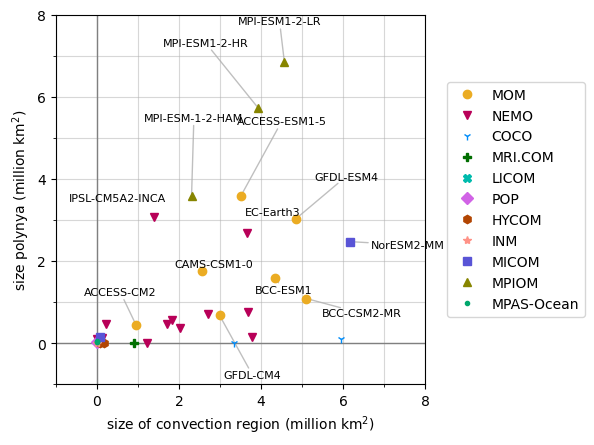

In [68]:
df_plot = pd.DataFrame({
    'y': area_p,
    'x': area_c,
    'name': model_name,
    'type': model_type
})

xgfs_normal6 = [(64, 83, 211), (221, 179, 16), (181, 29, 20), (0, 190, 255), (251, 73, 176), (0, 178, 93), (202, 202, 202)]
xgfs_normal12 = [(235, 172, 35), (184, 0, 88), (0, 140, 249), (0, 110, 0), (0, 187, 173), (209, 99, 230), (178, 69, 2), (255, 146, 135), (89, 84, 214), (135, 133, 0), (0, 167, 108), (189, 189, 189)]
xgfs_bright6 = [(239, 230, 69), (233, 53, 161), (0, 227, 255), (225, 86, 44), (83, 126, 255), (0, 203, 133), (238, 238, 238)]
xgfs_dark6 = [(0, 89, 0), (0, 0, 120), (73, 13, 0), (138, 3, 79), (0, 90, 138), (68, 53, 0), (88, 88, 88)]
xgfs_fancy6 = [(86, 100, 26), (192, 175, 251), (230, 161, 118), (0, 103, 138), (152, 68, 100), (94, 204, 171), (205, 205, 205)]
xgfs_tarnish6 = [(39, 77, 82), (199, 162, 166), (129, 139, 112), (96, 78, 60), (140, 159, 183), (121, 104, 128), (192, 192, 192)]

marker_list = ['o','v','1','P','X','D','h','*','s','^','.']

fig, ax = plt.subplots()
ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)
cc = 0
for mtype in df_plot['type'].unique():
    plotdata_df = df_plot.loc[df_plot['type'] == mtype]
    ax.plot(plotdata_df.x, plotdata_df.y, 
            marker=marker_list[cc], 
            markeredgecolor = tuple(ti/255 for ti in xgfs_normal12[cc]),
            markerfacecolor = tuple(ti/255 for ti in xgfs_normal12[cc]),
            linestyle='', ms=6, label=mtype)
    cc += 1

texts=[]
for ind in df_plot.index:
    if df_plot['type'][ind] == 'MOM':
        texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText
    else:
        if df_plot['x'][ind]>1:
            if df_plot['y'][ind]>1:
                texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText

adjust_text(texts, df_plot.x.values, df_plot.y.values, ax=ax, # avoid_self=True, #force_explode = (0.2, 0.2),
            time_lim=1, #Give it 1 second instead of 0.1 sec to arrange such dense labels
            arrowprops=dict(arrowstyle='-', color='gray', alpha=.5))

ax.set_xlim([-1, 8])
ax.set_ylim([-1, 8])
ax.set_aspect('equal', adjustable='box')

ax.set_xticks(np.linspace(0,8,5), minor=False) # only the 50% is major
ax.set_xticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
ax.set_yticks(np.linspace(0,8,5), minor=False) # only the 50% is major
ax.set_yticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
ax.grid(which='both', axis='both',alpha=.5) # draw grid
ax.set_xlabel("size of convection region (million km$^2$)")
ax.set_ylabel("size polynya (million km$^2$)")
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
# ax.legend(loc="upper left")


Vertically inergrated Heat Budget

$$\frac{dQ}{dt} = F + \rho_0 C_p \int_{-H}^{\zeta} - (\Delta \cdot u \theta)dz + resitual$$

F surface heating   surface convengence


In [ ]:
Cp = 3994
sigma0 * Cp *dat * 